## Exercise 08 : Seaborn

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [20]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [40]:
query = """
        select uid, timestamp, numTrials from checker
        where uid like 'user_%' and status = 'ready' and
        labname = 'project1'
        """

df = pd.read_sql(query, conn, parse_dates='timestamp')
df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


Text(0.5, 1.0, 'Dynamic of commits per user in project1')

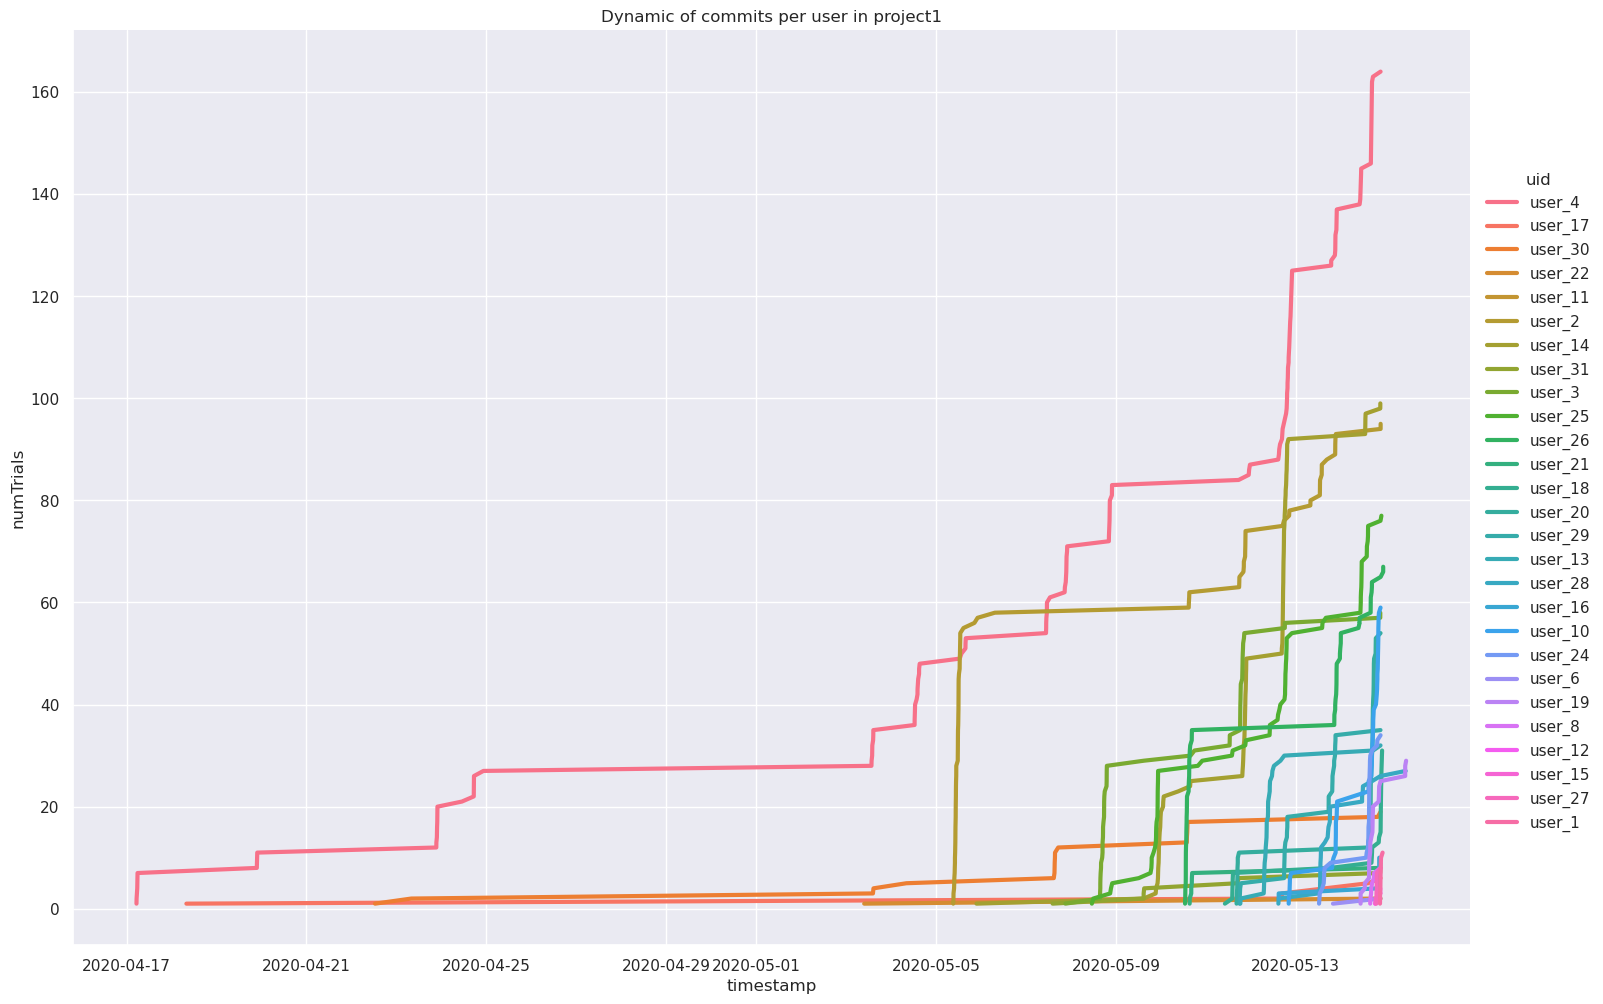

In [56]:
sns.set_theme()
sns.relplot(data=df, x='timestamp', y='numTrials', hue='uid', linewidth=3, legend='full', kind='line', height=10, aspect=1.5)
plt.title('Dynamic of commits per user in project1')

“Which user was the leader in the number of commits almost all of the time?”
- The answer: user_4.

“Which user was the leader for only a short period of time?”
- The answer: user_2.

In [58]:
conn.close()